In [ ]:
import os
import zipfile

local_zip = '/tmp/training.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/ ')
zip_ref.close()

local_zip = '/tmp/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
daunjarak_dir = os.path.join('/tmp/training/daun-jarak')
kumiskucing_dir = os.path.join('/tmp/training/kumis-kucing')
lidahbuaya_dir = os.path.join('/tmp/training/lidah-biaya')
daunpegagan_dir = os.path.join('/tmp/training/daun-pegagan')
daunsirih_dir = os.path.join('/tmp/training/daun-sirih')

print('Total training daun jarak images:', len(os.listdir(daunjarak_dir)))
print('Total training kumis kucing images:', len(os.listdir(kumiskucing_dir)))
print('Total training lidah buaya images:', len(os.listdir(lidahbuaya_dir)))
print('Total training daun pegagan images:', len(os.listdir(daunpegagan_dir)))
print('Total training dauh sirih images:', len(os.listdir(daunsirih_dir)))


# daunjarak_files = os.listdir(daunjarak_dir)
# print(daunjarak_files[:10])

# kumiskucing_files = os.listdir(kumiskucing_dir)
# print(kumiskucing_files[:10])

# lidahbuaya_files = os.listdir(lidahbuaya_dir)
# print(lidahbuaya_files[:10])

# daunpegagan_files = os.listdir(daunpegagan_dir)
# print(daunpegagan_files[:10])

# daunsirih_files = os.listdir(daunsirih_dir)
# print(daunsirih_files[:10])

Total training daun jarak images: 807
Total training kumis kucing images: 923
Total training lidah buaya images: 844


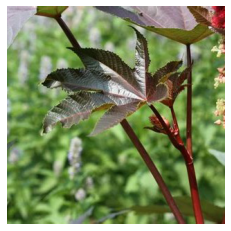

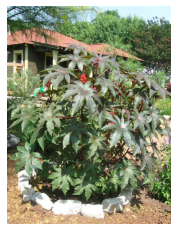

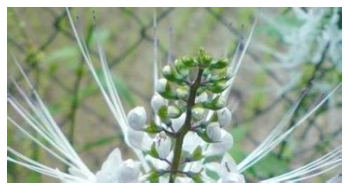

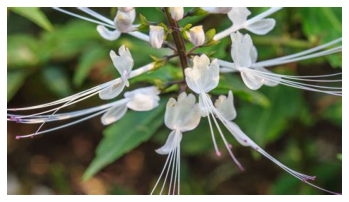

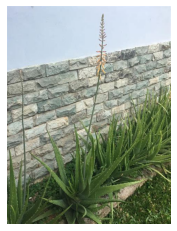

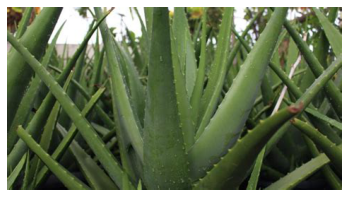

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_daunjarak = [os.path.join(daunjarak_dir, fname) 
                for fname in daunjarak_files[pic_index-2:pic_index]]
next_kumiskucing = [os.path.join(kumiskucing_dir, fname) 
                for fname in kumiskucing_files[pic_index-2:pic_index]]
next_lidahbuaya = [os.path.join(lidahbuaya_dir, fname) 
                for fname in lidahbuaya_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_daunjarak+next_kumiskucing+next_lidahbuaya):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/training/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("herbacrop")

Found 2574 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_______________________________________

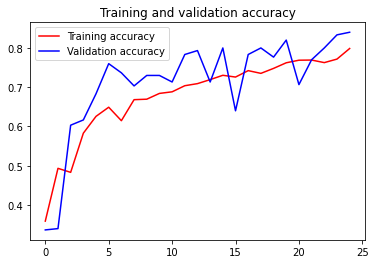

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0] == 1.0 :
    print('Daun Jarak')
  elif classes[0][1] == 1.0:
    print('Kumis Kucing')
  elif classes[0][2] == 1.0:
    print('Lidah Buaya')

Saving image5.jpg to image5.jpg
image5.jpg
Lidah Buaya
